In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
class Model(object):
    n = 0
    theta = []

    def __init__(self):
        super().__init__()

    def _evaluate(self, X, theta, y):
        x = np.dot(X, theta) - y
        return x

    def train(self, data, epoch=10, verbose=True, batch_size=None, learning_rate=1.0):
        for row in data:
            row.append(row[-1])
            row[-2] = 1
        data = np.array(data, dtype=np.float32)
        n = data.shape[1]
        self.theta = np.random.rand(n - 1, 1)
        if not batch_size:
            batch_size = 10
        steps = data.shape[0] // batch_size + 1
        epoches = [int(x) for x in range(epoch)]
        errors = []
        for i in range(epoch):
            error = 0.0
            for j in range(steps):
                raw_data = []
                y = []
                for k in range(
                    j * batch_size, min(data.shape[0], (j + 1) * batch_size)
                ):
                    raw_data.append(data[k][:-1])
                    y.append([data[k][-1]])
                raw_data = np.array(raw_data, dtype=np.float32)
                y = np.array(y, dtype=np.float32)
                if len(raw_data) > 0 and len(y) > 0:
                    x = self._evaluate(raw_data, self.theta, y)
                    error = error + np.dot(np.transpose(x), x)[0][0]
                    transpose = np.transpose(raw_data)
                    self.theta = self.theta - np.dot(transpose, x) * 2 * learning_rate
            errors.append(error)
            if verbose:
                print("epoch: {} error: {}".format(i, error))
        return {"epoches": epoches, "errors": errors}

    def predict(self, data):
        data.append(1.0)
        raw_data = np.array([data], dtype=np.float32)
        return np.dot(raw_data, self.theta)[0][0]


83
epoch: 451 error: 314.87827192856224
epoch: 452 error: 314.60769697600375
epoch: 453 error: 314.34004886409804
epoch: 454 error: 314.07529593965427
epoch: 455 error: 313.8134068917675
epoch: 456 error: 313.5543507481183
epoch: 457 error: 313.29809687131046
epoch: 458 error: 313.0446149552505
epoch: 459 error: 312.7938750215644
epoch: 460 error: 312.5458474160548
epoch: 461 error: 312.30050280519504
epoch: 462 error: 312.05781217266156
epoch: 463 error: 311.8177468159046
epoch: 464 error: 311.5802783427551
epoch: 465 error: 311.34537866806824
epoch: 466 error: 311.11302001040383
epoch: 467 error: 310.88317488874236
epoch: 468 error: 310.65581611923636
epoch: 469 error: 310.43091681199706
epoch: 470 error: 310.20845036791616
epoch: 471 error: 309.9883904755208
epoch: 472 error: 309.77071110786426
epoch: 473 error: 309.5553865194485
epoch: 474 error: 309.34239124318145
epoch: 475 error: 309.1317000873662
epoch: 476 error: 308.92328813272366
epoch: 477 error: 308.7171307294459
epoch: 47

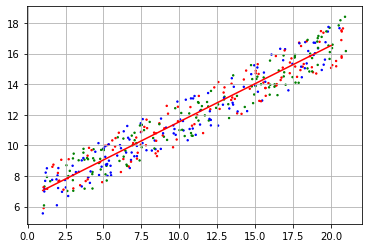

In [17]:
regression = Model()
data = []
x_cut = []
y_cut = []
for i in range(400):
    x = random.random()*20+1
    z = 0.5*x + 5.0 + random.random()*3.0
    x_cut.append(x)
    y_cut.append(z)
    data.append([x, z])
result = regression.train(data=data, batch_size=50, epoch=1000, learning_rate=0.00003, verbose=True)
x = []
y = []
for i in range(20):
    x.append(i+1)
    y.append(regression.predict([i+1]))
plt.plot(x, y, "r-")
categories = []
for i in range(400):
    categories.append(random.randrange(0,3))
colormap = np.array(["r", "g", "b"])
plt.scatter(x_cut, y_cut, c=colormap[categories], s=2)
plt.grid()
plt.show()